In [1]:
import os
print(os.getcwd())  # Outputs the current working directory


C:\Users\Himanshi\QtechsolutionsInternProjects\RetailDatasetCleaning


In [2]:
import pandas as pd

#file_path='QtechsolutionsInternProjects/RetailDatasetCleaning/retail_sales_dataset.csv'
#df = pd.read_csv(file_path)
#load the data into the dataframe for panda processing
ogdf = pd.read_csv("retail_sales_dataset.csv")

# Preview the data
print(ogdf.head())
print(ogdf.info())
print(ogdf.describe())  

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [3]:
df=ogdf.copy() #create a copy of the data set to perform operations upon

In [4]:
print(df.isnull().sum())  # Count of missing values in each column

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
#introducing messiness to the data set

import numpy as np
df['Age'] = df['Age'].mask(np.random.random(df['Age'].shape) < 0.1)
df = pd.concat([df, df.iloc[0:3]], ignore_index=True)
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].replace(['2021-12-01', '01/12/2021'], ['12-01-2021', '12/01/2021'])
df.loc[df.sample(frac=0.05, random_state=42).index, 'Date'] = '2023/31/12'
df.loc[df.sample(frac=0.05, random_state=24).index, 'Date'] = 'December 25, 2023'
df.loc[10, 'Price per Unit'] = 99999
df.loc[20, 'Quantity'] = 10000 
df.loc[14, 'Date'] = np.nan 
df.loc[34, 'Date'] = np.nan
df.loc[224, 'Date'] = np.nan
df.loc[344, 'Date'] = np.nan
df.loc[214, 'Date'] = np.nan
df['Price per Unit'] = df['Price per Unit'].mask(np.random.random(df['Price per Unit'].shape) < 0.1)
df['Quantity'] = df['Quantity'].mask(np.random.random(df['Quantity'].shape) < 0.05)
df.loc[df.sample(frac=0.1, random_state=42).index, 'Price per Unit'] = np.nan
df.loc[df.sample(frac=0.1, random_state=24).index, 'Quantity'] = np.nan
df.loc[df.sample(frac=0.05, random_state=15).index, 'Date'] = np.nan
duplicates = df.sample(n=5, random_state=42)
df = pd.concat([df, duplicates], ignore_index=True)
df.loc[df.sample(n=3, random_state=42).index, 'Price per Unit'] = 99999
df.loc[df.sample(n=3, random_state=24).index, 'Quantity'] = 10000
n_rows = df.shape[0]

In [6]:
print(df.isnull().sum())

Transaction ID        0
Date                 55
Customer ID           0
Gender                0
Age                 102
Product Category      0
Quantity            145
Price per Unit      198
Total Amount          0
dtype: int64


In [7]:
#df = df.drop(['Price_per_Unit', 'ProductName', 'OrderDate','Price','Price per unit'], axis=1)

In [8]:
print(df.describe())
print("Unique values\n",df.nunique())
print("Total entries\n",df.count())
print("Null values\n",df.isnull().sum())
print(df.shape)
print(df.columns)
print("The datatypes are \n",df.dtypes)
print("The number of duplicates is \n",df.duplicated().sum())

       Transaction ID         Age      Quantity  Price per Unit  Total Amount
count     1008.000000  906.000000    863.000000      810.000000   1008.000000
mean       499.496032   41.124724     48.858633      551.786420    454.766865
std        289.247169   13.639920    679.451817     6070.163533    558.951592
min          1.000000   18.000000      1.000000       25.000000     25.000000
25%        249.750000   29.000000      2.000000       30.000000     60.000000
50%        500.500000   42.000000      3.000000       50.000000    120.000000
75%        749.250000   53.000000      4.000000      300.000000    900.000000
max       1000.000000   64.000000  10000.000000    99999.000000   2000.000000
Unique values
 Transaction ID      1000
Date                 334
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               5
Price per Unit         6
Total Amount          18
dtype: int64
Total entries
 Transaction ID      1008
Date 

In [9]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [10]:
df.rename(columns={
    'Price per Unit': 'Price_Per_Unit',
    'Total Amount': 'Total_Amount',
    'Date':'OrderID','Price per Unit':'Price', 'Total Amount':'Total',
'Date':'OrderDate'
}, inplace=True)
df.columns

Index(['Transaction ID', 'OrderDate', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price', 'Total'],
      dtype='object')

In [11]:
print("The null values are\n",df.isnull().sum())
df.dtypes
print("The number of duplicate values are",df.duplicated().sum())

The null values are
 Transaction ID        0
OrderDate            55
Customer ID           0
Gender                0
Age                 102
Product Category      0
Quantity            145
Price               198
Total                 0
dtype: int64
The number of duplicate values are 8


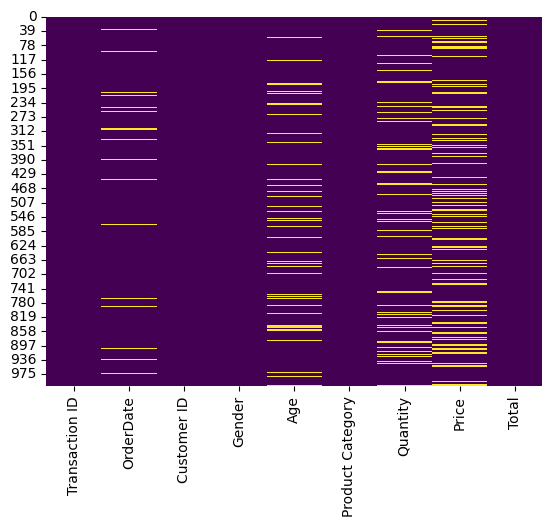

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


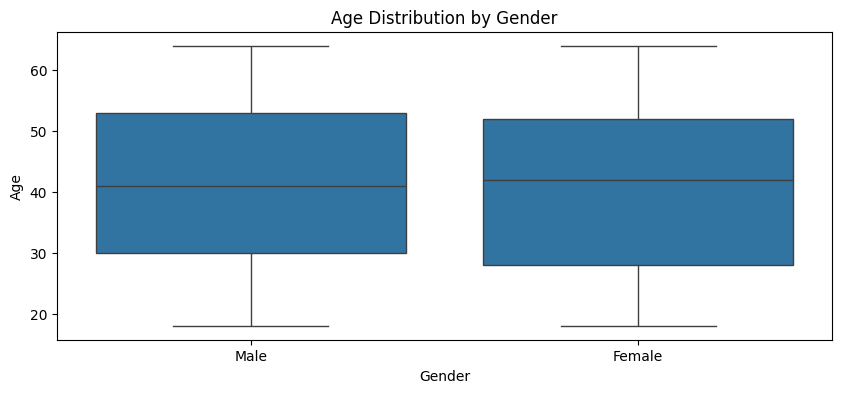

In [13]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.show()


In [14]:
df['Age'] = df.groupby('Gender')['Age'].transform(
        lambda x: x.fillna(x.median())
    )

In [15]:
print("The null values are\n",df.isnull().sum())

The null values are
 Transaction ID        0
OrderDate            55
Customer ID           0
Gender                0
Age                   0
Product Category      0
Quantity            145
Price               198
Total                 0
dtype: int64


In [16]:
df['OrderDate']=df['OrderDate'].fillna(df['OrderDate'].mode()[0])

In [17]:
print("The null values are\n",df.isnull().sum())

The null values are
 Transaction ID        0
OrderDate             0
Customer ID           0
Gender                0
Age                   0
Product Category      0
Quantity            145
Price               198
Total                 0
dtype: int64


In [18]:
# Fill missing 'Quantity' with Total / Price (only where Price is available)
df['Quantity'] = df['Quantity'].fillna(df['Total'] / df['Price'])
# Fill missing 'Price' with Total / Quantity (only where Quantity is available)
df['Price'] = df['Price'].fillna(df['Total'] / df['Quantity'])

# If both 'Quantity' and 'Price' are missing, fill them with median values
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Price'] = df['Price'].fillna(df['Price'].median())

print(df.isnull().sum())

Transaction ID      0
OrderDate           0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price               0
Total               0
dtype: int64


In [19]:
print("The number of duplicate values are",df.duplicated().sum())

The number of duplicate values are 8


In [20]:
df = df.drop_duplicates()

In [21]:
print("The number of duplicate values are",df.duplicated().sum())

The number of duplicate values are 0


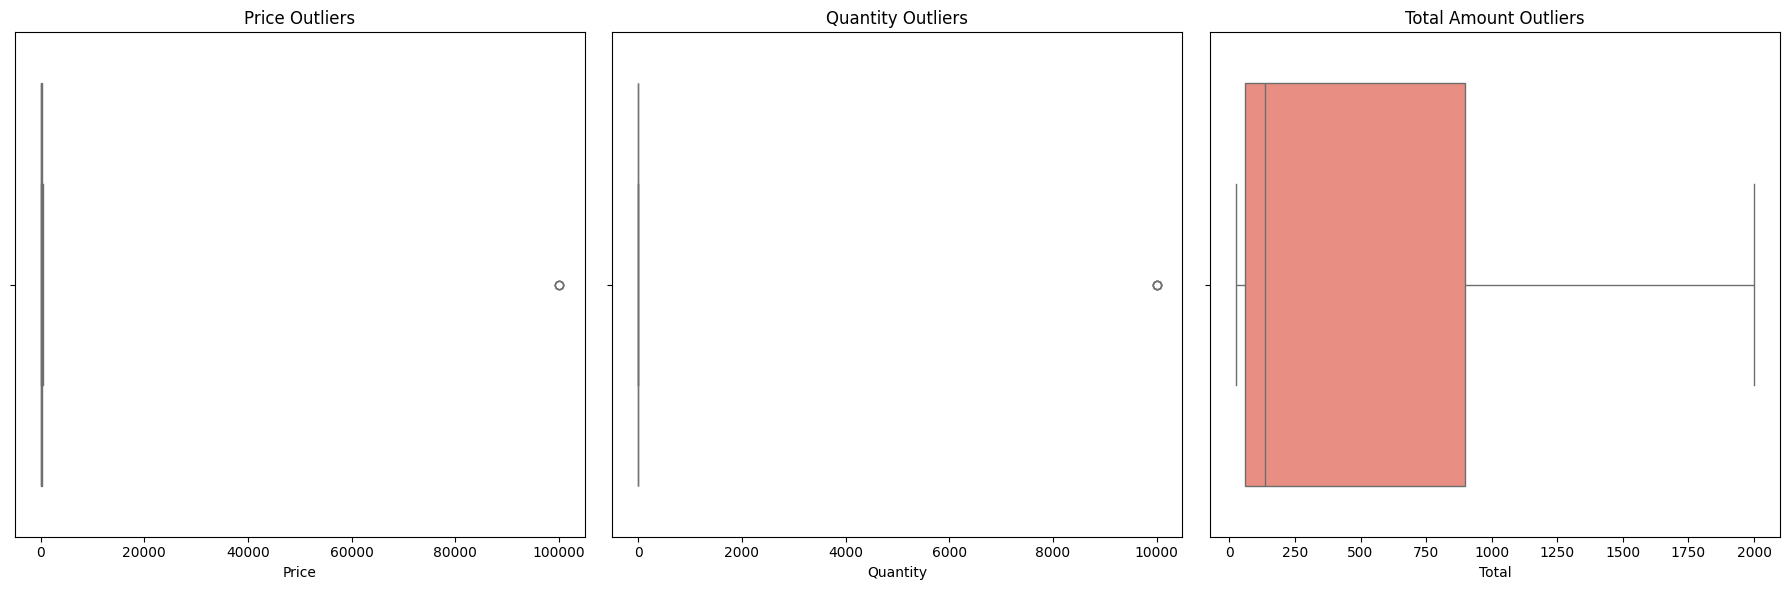

In [22]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Price'], color='skyblue')
plt.title('Price Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Quantity'], color='lightgreen')
plt.title('Quantity Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Total'], color='salmon')
plt.title('Total Amount Outliers')

plt.tight_layout()
plt.show()

In [23]:
from scipy import stats
#Z-score tests for handling outliers
z_scores = np.abs(stats.zscore(df[['Price', 'Quantity', 'Total']]))
outliers = (z_scores > 3)

print("The outliers are\n",df[outliers.any(axis=1)])
dfnew = df[(z_scores < 3).all(axis=1)]

The outliers are
      Transaction ID   OrderDate Customer ID  Gender   Age Product Category  \
20               21  2023-01-14     CUST021  Female  50.0           Beauty   
169             170  2023-06-02     CUST170  Female  25.0         Clothing   
226             227  2023-10-11     CUST227    Male  36.0      Electronics   
602             603  2023-07-16     CUST603  Female  42.0         Clothing   
630             631  2023-11-10     CUST631    Male  56.0      Electronics   
682             683  2023-01-04     CUST683    Male  38.0           Beauty   
938             939  2023-12-18     CUST939  Female  46.0      Electronics   

     Quantity    Price  Total  
20    10000.0    500.0    500  
169   10000.0     25.0     50  
226   10000.0     50.0    100  
602   10000.0     30.0     90  
630       3.0  99999.0     90  
682       2.0  99999.0   1000  
938       1.0  99999.0    300  


In [24]:
dfnew

,Transaction ID,OrderDate,Customer ID,Gender,Age,Product Category,Quantity,Price,Total
0,1,2023-11-24,CUST001,Male,34.0,Beauty,3.0,50.0,150
1,2,2023-02-27,CUST002,Female,26.0,Clothing,2.0,500.0,1000
2,3,2023-01-13,CUST003,Male,50.0,Electronics,1.0,30.0,30
3,4,"December 25, 2023",CUST004,Male,37.0,Clothing,1.0,500.0,500
4,5,2023-05-06,CUST005,Male,30.0,Beauty,2.0,50.0,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62.0,Clothing,1.0,50.0,50
996,997,2023-11-17,CUST997,Male,52.0,Beauty,3.0,30.0,90
997,998,2023-10-29,CUST998,Female,23.0,Beauty,4.0,25.0,100
998,999,2023-12-05,CUST999,Female,36.0,Electronics,3.0,50.0,150


In [25]:
df

,Transaction ID,OrderDate,Customer ID,Gender,Age,Product Category,Quantity,Price,Total
0,1,2023-11-24,CUST001,Male,34.0,Beauty,3.0,50.0,150
1,2,2023-02-27,CUST002,Female,26.0,Clothing,2.0,500.0,1000
2,3,2023-01-13,CUST003,Male,50.0,Electronics,1.0,30.0,30
3,4,"December 25, 2023",CUST004,Male,37.0,Clothing,1.0,500.0,500
4,5,2023-05-06,CUST005,Male,30.0,Beauty,2.0,50.0,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62.0,Clothing,1.0,50.0,50
996,997,2023-11-17,CUST997,Male,52.0,Beauty,3.0,30.0,90
997,998,2023-10-29,CUST998,Female,23.0,Beauty,4.0,25.0,100
998,999,2023-12-05,CUST999,Female,36.0,Electronics,3.0,50.0,150


In [26]:
print(dfnew.dtypes)

Transaction ID        int64
OrderDate            object
Customer ID          object
Gender               object
Age                 float64
Product Category     object
Quantity            float64
Price               float64
Total                 int64
dtype: object


In [27]:
dfnew.loc[:, 'OrderDate'] = pd.to_datetime(dfnew['OrderDate'], errors='coerce')
dfnew.loc[:, 'Quantity'] = dfnew['Quantity'].astype(int)
dfnew.loc[:, 'Customer ID'] = dfnew['Customer ID'].astype('category')
dfnew.loc[:, 'Gender'] = dfnew['Gender'].astype('category')

In [28]:
print(dfnew.dtypes)

Transaction ID        int64
OrderDate            object
Customer ID          object
Gender               object
Age                 float64
Product Category     object
Quantity            float64
Price               float64
Total                 int64
dtype: object


In [29]:
dfnew.columns = dfnew.columns.str.strip()           # Remove extra spaces
dfnew.columns = dfnew.columns.str.lower()           # Convert to lowercase
dfnew.columns = dfnew.columns.str.replace(' ', '_')

In [30]:
dfnew.columns

Index(['transaction_id', 'orderdate', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price', 'total'],
      dtype='object')

In [31]:
dfnew=dfnew.rename(columns={'orderdate':'order_date'})

In [32]:
dfnew.columns

Index(['transaction_id', 'order_date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price', 'total'],
      dtype='object')

In [33]:

dfnew.describe()


,transaction_id,age,quantity,price,total
count,993.000000,993.000000,993.000000,993.000000,993.000000
mean,500.731118,41.138973,2.520645,176.883182,457.069486
std,288.674179,12.969910,1.120658,188.454769,561.177587
min,1.000000,18.000000,1.000000,25.000000,25.000000
25%,252.000000,30.000000,2.000000,30.000000,60.000000
50%,500.000000,42.000000,3.000000,50.000000,150.000000
75%,751.000000,52.000000,4.000000,300.000000,900.000000
max,1000.000000,64.000000,4.000000,500.000000,2000.000000


In [34]:
dfnew.to_excel('cleaned_retail_data.xlsx', index=False)